<a href="https://colab.research.google.com/github/kleenman/tds_capstone/blob/emma/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install geopandas
!conda install geopandas


/bin/bash: line 1: conda: command not found


In [ ]:
import geopandas as gpd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import geopandas as gpd



In [ ]:
import requests
import json
import os

# Base URL for the files
base_url = 'https://www.opengeodata.nrw.de/produkte/geobasis/lusat/idop/idop_jp2_f2/'

# JSON string with the data
data = {
  "datasets": [
    {
      "files": [
        {"name":"idop20rgbi_32_288_5736_1_nw_2023.jp2", "size":"51056779", "timestamp":"2023-07-05T18:01:13"},
        {"name":"idop20rgbi_32_288_5737_1_nw_2023.jp2", "size":"49413971", "timestamp":"2023-07-05T18:02:22"},
        {"name":"idop20rgbi_32_288_5744_1_nw_2023.jp2", "size":"49529857", "timestamp":"2023-07-05T18:03:31"},
        {"name":"idop20rgbi_32_288_5745_1_nw_2023.jp2", "size":"52052845", "timestamp":"2023-07-05T18:04:41"},
        {"name":"idop20rgbi_32_288_5746_1_nw_2023.jp2", "size":"52558074", "timestamp":"2023-07-05T18:05:51"},
        {"name":"idop20rgbi_32_288_5747_1_nw_2023.jp2", "size":"47473976", "timestamp":"2023-07-05T18:07:00"},
        {"name":"idop20rgbi_32_289_5736_1_nw_2023.jp2", "size":"50599778", "timestamp":"2023-07-05T18:08:09"},
        {"name":"idop20rgbi_32_289_5737_1_nw_2023.jp2", "size":"51174512", "timestamp":"2023-07-05T18:09:18"},
        {"name":"idop20rgbi_32_289_5744_1_nw_2023.jp2", "size":"48853960", "timestamp":"2023-07-05T18:10:27"},
        {"name":"idop20rgbi_32_289_5745_1_nw_2023.jp2", "size":"50053184", "timestamp":"2023-07-05T18:11:36"},
        {"name":"idop20rgbi_32_289_5746_1_nw_2023.jp2", "size":"47205241", "timestamp":"2023-07-05T18:12:44"},
        {"name":"idop20rgbi_32_289_5747_1_nw_2023.jp2", "size":"46514071", "timestamp":"2023-07-05T18:13:53"}
      ]
    }
  ]
}

download_directory = 'downloaded_images'
os.makedirs(download_directory, exist_ok=True)

# Iterate over the datasets and files to download them
for dataset in data['datasets']:
    for file in dataset['files']:
        # Construct the full URL
        file_url = base_url + file['name']

        # Path for the local file
        local_file_path = os.path.join(download_directory, file['name'])

        # Stream the file content and write it to the local file
        with requests.get(file_url, stream=True) as r:
            r.raise_for_status()
            with open(local_file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

        print(f"Downloaded {file['name']}")

print('All files have been downloaded.')




Downloaded idop20rgbi_32_288_5736_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5737_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5744_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5745_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5746_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5747_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5736_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5737_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5744_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5745_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5746_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5747_1_nw_2023.jp2
All files have been downloaded.


In [ ]:
from PIL import Image

def rescale_image(filename, target_width=1000, target_height=1000):
    try:
        # Open the downloaded image using Pillow
        img = Image.open(filename)

        # Resize the image to the target dimensions while preserving the aspect ratio
        img.thumbnail((target_width, target_height))

        # Save the resized image
        img.save(filename)
        print(f"Image {filename} resized successfully!")
        return False
    except Exception as e:
        print(f"Error while resizing image {filename}: {e}")
        return True


In [ ]:
!pip install Pillow


In [ ]:
from PIL import Image

def rescale_image(filename, target_width=1000, target_height=1000):
    try:
        # Open the downloaded image using Pillow
        img = Image.open(filename)

        # Resize the image to the target dimensions while preserving the aspect ratio
        img.thumbnail((target_width, target_height))

        # Save the resized image
        img.save(filename)
        print(f"Image {filename} resized successfully!")
        return False
    except Exception as e:
        print(f"Error while resizing image {filename}: {e}")
        return True


In [ ]:
# Assuming 'data' is your dictionary from the JSON code
for dataset in data['datasets']:
    for file in dataset['files']:
        # The path to the downloaded image file
        local_file_path = os.path.join('downloaded_images', file['name'])

        # Call the rescale function
        error_occurred = rescale_image(local_file_path)
        if error_occurred:
            print(f"Failed to process {file['name']}")


Image downloaded_images/idop20rgbi_32_288_5736_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5737_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5744_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5745_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5746_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5747_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5736_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5737_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5744_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5745_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5746_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5747_1_nw_2023.jp2 resized successfully!


In [ ]:
!pip install Pillow exifread


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
download_directory = '/content/drive/My Drive/downloaded_images'
os.makedirs(download_directory, exist_ok=True)
local_file_path = os.path.join(download_directory, file['name'])

# Stream the file content and write it to the local file
with requests.get(file_url, stream=True) as r:
    r.raise_for_status()
    with open(local_file_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)


In [ ]:
!pip install exifread


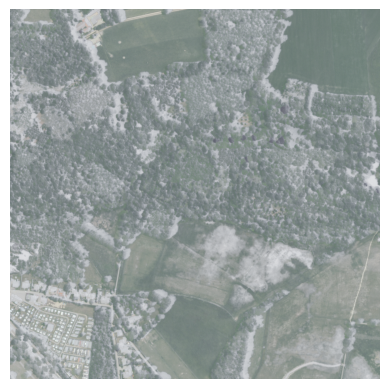

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open a JP2 image
image_path = '/content/downloaded_images/idop20rgbi_32_288_5736_1_nw_2023.jp2'
  # Replace with your image path
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
from pyproj import Transformer

# Transformer to convert from EPSG:25832 to EPSG:4326
transformer = Transformer.from_crs("EPSG:25832", "EPSG:4326")

# Example of transforming a single coordinate pair
easting, northing = 288000, 5736000
latitude, longitude = transformer.transform(northing, easting) # Note the order: (y, x) or (northing, easting)
print(f"Latitude: {latitude}, Longitude: {longitude}")


Latitude: 1.9158496084896521, Longitude: 51.511961285502224


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install geopandas
import geopandas as gpd

# Load the GeoJSON file
gdf = gpd.read_file('https://raw.githubusercontent.com/kleenman/tds_capstone/main/bayernatlas_munich.geojson')

# Print the GeoDataFrame
gdf


,name,description,styleUrl,srid,geometry
0,München,<table>\n<tr><td>Gebiet:</td><td>München</td><...,"https://atlas.bayern.de/?c=677751,5422939&z=7&...",3857,"MULTIPOLYGON Z (((11.38870 48.19740 0.00000, 1..."


In [1]:
import pandas as pd
from PIL import Image
import re # for regex functions

In [3]:
munich_image_urls = pd.read_csv("https://raw.githubusercontent.com/kleenman/tds_capstone/main/munich.csv",header=None)
munich_image_urls.head()

,0
0,https://download1.bayernwolke.de/a/dop40/data/...
1,https://download1.bayernwolke.de/a/dop40/data/...
2,https://download1.bayernwolke.de/a/dop40/data/...
3,https://download1.bayernwolke.de/a/dop40/data/...
4,https://download1.bayernwolke.de/a/dop40/data/...


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
!pip install pillow
import requests
from io import BytesIO
def download_and_rescale_image(url,filename, target_width=1000, target_height=1000):
    try:

        response = requests.get(url)
        response.raise_for_status()

        # Open the downloaded image using Pillow
        img = Image.open(BytesIO(response.content))

        # Resize the image to the target dimensions while preserving the aspect ratio
        img.thumbnail((target_width, target_height))

        # Save the resized image
        img.save(filename)
        print("Image downloaded and resized successfully!")
        return False
    except Exception as e:
        print("Error",e)
        return True



# Read the CSV file to get the image URLs
munich_image_urls_df = pd.read_csv("https://raw.githubusercontent.com/kleenman/tds_capstone/main/munich.csv", header=None)
munich_image_urls = munich_image_urls_df[0].tolist()
# Folder path in Google Drive where you want to save the images
save_folder_path = '/content/drive/My Drive/downloaded_images/'

# Loop through the image URLs and download/rescale each image
for i, url in enumerate(munich_image_urls):
    filename = url.split('/')[-1]  # This gets the last part of the URL (e.g., '32700_5330.tif')
    filename_without_extension = filename.split('.')[0]  # Removes the file extension (e.g., '32700_5330')
    full_save_path = f"{save_folder_path}/{filename_without_extension}_resized.jpg"

    # Download and resize the image
    download_and_rescale_image(url, full_save_path)

Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downl

In [17]:
!pip install osmnx

import osmnx as ox
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt


from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:25832","EPSG:4326")
geo_information = ox.features_from_bbox(north, south, east, west, tags={'leisure': 'park'})


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 2.1 MB/s eta 0:00:00


NameError: name 'north' is not defined